In [1]:
import numpy as np
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)

In [136]:
# How many people live on earth?

amtPeopleOnEarth = np.sum(nations, axis=0)[6]
print(amtPeopleOnEarth)

6482276104.0


In [137]:
# What is the average life expectancy of the world population?

avgLifeExp = np.mean(nations, axis=0)[4]
print(avgLifeExp)

71.69006134969325


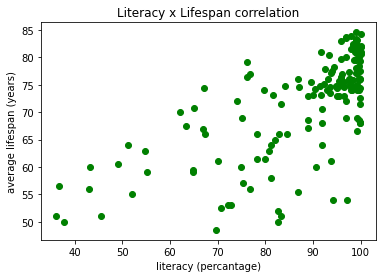

In [138]:
# Do people who can read live longer? Back up your claim with a diagram.

import matplotlib.pyplot as plt
plt.title("Literacy x Lifespan correlation")
plt.ylabel("average lifespan (years)")
plt.xlabel("literacy (percantage)")


plt.plot(nations[:,5]*100, nations[:,4], "og")

plt.show()

There appears to be a correlation between high literacy and a long life expactency. Although, high literacy does not always come with a high average lifespan. But on the opposite side of the spectrum there are no low-lifespan countries with higher-end literacy.
In conclusion: A high literacy is essential but not sufficient for long average lifespans.

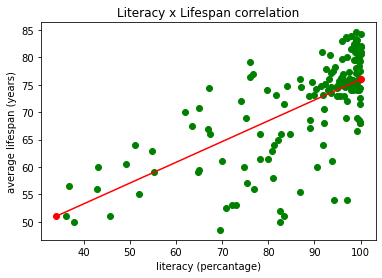

In [139]:
# Additionally, draw a straight line in the same plot, which approximately reflects the course of the data points.

plt.title("Literacy x Lifespan correlation")
plt.ylabel("average lifespan (years)")            # <--- same as before, since plot.show() does not allow further drawings
plt.xlabel("literacy (percantage)")

plt.plot(nations[:,5]*100, nations[:,4], "og")

x, y = [34, 100], [51, 76] # rough approximation 
plt.plot(x, y, marker = "o", color= "r")
plt.show()

In [141]:
# Create the appropriate linear equation and store it in a function.

def calcLifeSpan(literacy):
    
    # y = mx+n
    m=(51-76)/(34-100) # numbers from above (change in height)
    n=51-34*m # numbers from above (shift on y axis)
    
    # final equation: y = 0.378*x + 38.12
    
    return literacy*m+n




# Calculate how well the line approximates the data points by calculating the root-mean-square error (RMSE).

import math

sum = 0
lits = nations[:,5] # literacy array
spans = nations[:,4] # lifespan array

for x in range(len(lits)): # for every data point
    sum += (calcLifeSpan(lits[x]*100)-spans[x])**2 # sum up squares of difference between expection and reality
    
rmse = math.sqrt(sum/len(lits)) # root the sum divided by amount of sum-ups

print("RMSE: ", rmse) # result

RMSE:  6.527986011830154


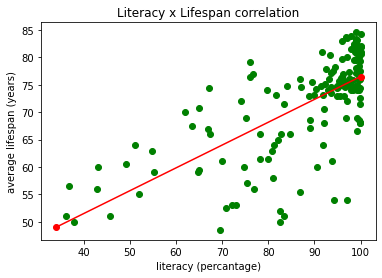

RMSE:  6.508700975976927


In [143]:
# Change the straight line by hand so that the error or deviation is smaller. Make a note of your best result.

plt.title("Literacy x Lifespan correlation")
plt.ylabel("average lifespan (years)")            # <--- same as before, since plot.show() does not allow further drawings
plt.xlabel("literacy (percantage)")

plt.plot(nations[:,5]*100, nations[:,4], "og")

x, y = [34, 100], [49, 76.5] # rough approximation 
plt.plot(x, y, marker = "o", color= "r")
plt.show()


def calcLifeSpan(literacy):
    
    # y = mx+n
    m=(49-76.5)/(34-100) # numbers from above (change in height)
    n=49-34*m # numbers from above (shift on y axis)
    
    # final equation: y = 0,416*x + 34.83
    
    return literacy*m+n



import math

sum = 0
lits = nations[:,5] # literacy array
spans = nations[:,4] # lifespan array

for x in range(len(lits)): # for every data point
    sum += (calcLifeSpan(lits[x]*100)-spans[x])**2 # sum up squares of difference between expection and reality
    
rmse = math.sqrt(sum/len(lits)) # root the sum divided by amount of sum-ups

print("RMSE: ", rmse) # result

After trying for several minutes, I managed to achieve a slightly better result. Seems like the first approximation was already very close to the best I can come up with. 

FINAL EQUATION:

   y = 0.416*x + 34.83 RMSE    ~ 6.508700975976927

PREVIOUSLY:
   y = 0.378*x + 38.12 RMSE    ~ 6.527986011830154